### Import API data from the Web using requests module

In [1]:
# to get api data, we need to use the requests library

# let us import this

import requests

In [2]:
# get some api data from the WHO website

req = requests.get('http://apps.who.int/gho/athena/api/COUNTRY?format=json')

Well, that was simple enough

In [3]:
# let us now see the json encoded content which we have imported

data = req.json()

data

{'copyright': '(c) World Health Organization',
 'dataset': [],
 'attribute': [{'label': 'DS', 'display': 'DS'},
  {'label': 'FIPS', 'display': 'FIPS'},
  {'label': 'IOC', 'display': 'IOC'},
  {'label': 'ISO2', 'display': 'ISO2'},
  {'label': 'ISO', 'display': 'ISO'},
  {'label': 'ITU', 'display': 'ITU'},
  {'label': 'MARC', 'display': 'MARC'},
  {'label': 'WHO', 'display': 'WHO'},
  {'label': 'WMO', 'display': 'WMO'},
  {'label': 'GEOMETRY', 'display': 'GEOMETRY'},
  {'label': 'MORT', 'display': 'MORT'},
  {'label': 'LAND_AREA_KMSQ_2012', 'display': 'LAND_AREA_KMSQ_2012'},
  {'label': 'LANGUAGES_EN_2012', 'display': 'LANGUAGES_EN_2012'},
  {'label': 'WHO_REGION', 'display': 'WHO_REGION'},
  {'label': 'WHO_REGION_CODE', 'display': 'WHO_REGION_CODE'},
  {'label': 'WORLD_BANK_INCOME_GROUP', 'display': 'World Bank income group'},
  {'label': 'WORLD_BANK_INCOME_GROUP_CODE',
   'display': 'World Bank income group code'},
  {'label': 'SHORTNAMEES', 'display': 'SHORTNAMEES'},
  {'label': 'SHOR

### Saving API data into JSON in disk

In [4]:
# this is how we will convert json contents of api and save it to disk

# if we need to save it

import json

with open(r'R:\Project Work\Random Data Requests\api-json-write\api-data.json','w') as f:
    
    json.dump(data, f)


### Parsing dict object JSON data into dataframes

In [5]:
# let us see what type of data this has returned with json

type(data)

dict

JSON's are dictionary objects in Python

In [6]:
# let us try to extract the dict information into a data frame

import pandas as pd

# we have to set orient = 'index', else we will get an error

df_dict = pd.DataFrame.from_dict(data, orient='index')

df_dict.head()

,0
copyright,(c) World Health Organization
dataset,[]
attribute,"[{'label': 'DS', 'display': 'DS'}, {'label': '..."
dimension,"[{'label': 'COUNTRY', 'display': 'Country', 'i..."
fact,[]


In [7]:
# we will now need to transpose this to get into a tabular structure

#save this as our new dataframe

df5 = df_dict.transpose()

df5.head()

,copyright,dataset,attribute,dimension,fact
0,(c) World Health Organization,[],"[{'label': 'DS', 'display': 'DS'}, {'label': '...","[{'label': 'COUNTRY', 'display': 'Country', 'i...",[]


This agrees to the first level nested architecture of the JSON from what we have seen in the web

We are kind of stuck trying to flatten this, so we will approach this problem in an alternative way

Let us try this next

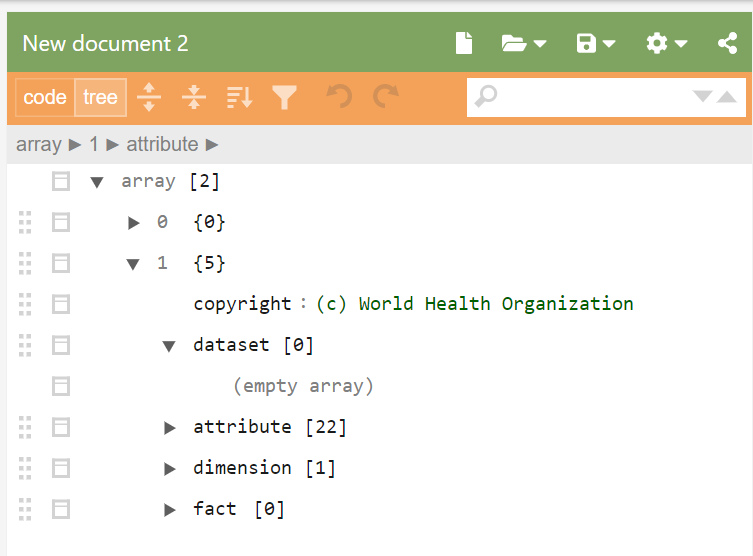


### Using pandas.json_normalize to flatten JSON data

In [8]:
# we will go back to our original json extract dictionary

# this is because to use json_normalize expects a dict as input

type(data)

dict

In [9]:
# let us apply a simple json_normalize and see how it looks like

df6 = pd.json_normalize(data)

df6.head()

,copyright,dataset,attribute,dimension,fact
0,(c) World Health Organization,[],"[{'label': 'DS', 'display': 'DS'}, {'label': '...","[{'label': 'COUNTRY', 'display': 'Country', 'i...",[]


now we have figured out that all the data we need is stored within the code nested architecture within dimension

now we have to access this path and give this as the dict for json_normalize to flatten

and below is how we will access the particular dictionary element 

this can get confusing as we have a list within a dictionary that contains another dictionary

to solve this have a look at one of answers in https://stackoverflow.com/questions/44207141/python-dictionary-access-via-keyword-typeerror-list-indices-must-be-integers-o

In [10]:
# from above this is how we will get to the code element in the nested dictionary

data['dimension'][0]['code']

[{'label': 'AFG',
  'display': 'Afghanistan',
  'display_sequence': 10,
  'url': '',
  'attr': [{'category': 'WORLD_BANK_INCOME_GROUP_GNI_REFERENCE_YEAR',
    'value': '2017'},
   {'category': 'WORLD_BANK_INCOME_GROUP_RELEASE_DATE', 'value': '2018'},
   {'category': 'WHO_REGION', 'value': 'Eastern Mediterranean'},
   {'category': 'WORLD_BANK_INCOME_GROUP', 'value': 'Low income'},
   {'category': 'WHO_REGION_CODE', 'value': 'EMR'},
   {'category': 'WORLD_BANK_INCOME_GROUP_CODE', 'value': 'WB_LI'},
   {'category': 'DS', 'value': 'AFG'},
   {'category': 'FIPS', 'value': 'AF'},
   {'category': 'IOC', 'value': 'AFG'},
   {'category': 'ISO2', 'value': 'AF'},
   {'category': 'ISO', 'value': 'AFG'},
   {'category': 'ITU', 'value': 'AFG'},
   {'category': 'MARC', 'value': 'af'},
   {'category': 'WHO', 'value': 'AFG'},
   {'category': 'WMO', 'value': 'AF'},
   {'category': 'GEOMETRY', 'value': 'AFG'},
   {'category': 'MORT', 'value': '3010'},
   {'category': 'LAND_AREA_KMSQ_2012', 'value': '652,

In [11]:
#now, we understand that all of the data is stored in the dimension & code hierarchy

# so, let us access the data as below

# we need the labels meta of the architecture so that we can unravel the data by country easily later

df8 = pd.json_normalize(data['dimension'][0]['code'],record_path='attr',meta=['label','display'])

# let us see if this works

df8.head()

,category,value,label,display
0,WORLD_BANK_INCOME_GROUP_GNI_REFERENCE_YEAR,2017,AFG,Afghanistan
1,WORLD_BANK_INCOME_GROUP_RELEASE_DATE,2018,AFG,Afghanistan
2,WHO_REGION,Eastern Mediterranean,AFG,Afghanistan
3,WORLD_BANK_INCOME_GROUP,Low income,AFG,Afghanistan
4,WHO_REGION_CODE,EMR,AFG,Afghanistan


Okay, so we have more nested dimensions and seems like our data is stored inside code

In [12]:
# let us rename label and display as country label and country name

df8 = df8.rename(columns={'label':'country label','display':'country name'})

df8.head()

,category,value,country label,country name
0,WORLD_BANK_INCOME_GROUP_GNI_REFERENCE_YEAR,2017,AFG,Afghanistan
1,WORLD_BANK_INCOME_GROUP_RELEASE_DATE,2018,AFG,Afghanistan
2,WHO_REGION,Eastern Mediterranean,AFG,Afghanistan
3,WORLD_BANK_INCOME_GROUP,Low income,AFG,Afghanistan
4,WHO_REGION_CODE,EMR,AFG,Afghanistan


In [13]:
# let us save it to disk and evaluate

df8.to_csv(r'R:\Project Work\Random Data Requests\api-json-write\json-unravel.csv')

In [14]:
# let us pivot data which should help us achieve our results 

# i.e. get all the results by country name

# hopefully

df10 = df8.pivot(index='country name',columns='category',values='value')

df10.head()


category,DS,FIPS,GEOMETRY,IOC,ISO,ISO2,ITU,LAND_AREA_KMSQ_2012,LANGUAGES_EN_2012,MARC,...,SHORTNAMEFR,WHO,WHOLEGALSTATUS,WHO_REGION,WHO_REGION_CODE,WMO,WORLD_BANK_INCOME_GROUP,WORLD_BANK_INCOME_GROUP_CODE,WORLD_BANK_INCOME_GROUP_GNI_REFERENCE_YEAR,WORLD_BANK_INCOME_GROUP_RELEASE_DATE
country name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,AF,AFG,AFG,AFG,AF,AFG,"652,230","Dari, Pashto, Turkic languages, 30 minor langu...",af,...,Afghanistan,AFG,M,Eastern Mediterranean,EMR,AF,Low income,WB_LI,2017,2018
Albania,AL,AL,ALB,ALB,ALB,AL,ALB,"27,400","Albanian, Greek, Vlach, Romani, Slavic dialects",aa,...,Albanie,ALB,M,Europe,EUR,AB,Upper middle income,WB_UMI,2017,2018
Algeria,DZ,AG,DZA,ALG,DZA,DZ,ALG,"2,381,740","Arabic, French, Berber dialects",ae,...,Algérie,ALG,M,Africa,AFR,AL,Upper middle income,WB_UMI,2017,2018
American Samoa,NaN,NaN,ASM,NaN,ASM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,WB_UMI,2017,2018
Andorra,AND,AN,AND,AND,AND,AD,AND,470,"Catalan, French, Castilian, Portuguese",an,...,Andorre,AND,M,Europe,EUR,NaN,High income,WB_HI,2017,2018


In [15]:
# let us export this to disk and sense check

df10.to_csv(r'R:\Project Work\Random Data Requests\api-json-write\json-unravel-by-country.csv')

Yes, and all of that seems to work great.

So this is a great way to read API data and parse it into a tabular format

Which is where Power BI becomes useful